## 0.0 **Belgian Traffic Signs Classification:** 

This notebook shows step by step how to achieve upto **99% validation accuracy** with BelgianTS dataset using convolutional neural network.

#### **Dataset:**
The dataset of BelgianTS is wellknown and probably it has [various versions](https://btsd.ethz.ch/shareddata/)  with different sizes. The dataset used here contains 62 classes of images, with 4575 images (227 MB) for training and 2520 for validation (105 MB).

#### **Models applied:**
The notebook starts with a very simple feed-forward NN with just two layers claiming 93.8% validation accuracy. Then different layers (Conv2D, Pooling, Dropuout etc.) have been added step by step to increase the accuracy on the validation set. Different image augmentation techniques have also has been attempted like flipping, rotation, random-zoom etc. At the end transfer learning has been applied with models from TensorFlow Hub. 

#### **Images resolution, model complexity and the accuracy:** 
The training dataset has not been gone through any preprocessig, rather originl images have been used. The resolution of the images has been kept as low as possible. The resolution of 28-28-3 has been used for most cases, at the end 56-56-3 has also been used in order to see whether they can achieve higher accuracy than that of lower resolution images. The beuaty of low resolution images is that it deos not take longer time for training and very simple NN model can give convincing accuracy. At the beginning light-weight models have been attempted with lower resolution images. Grey scale images results in faster training, whereas RGB images give higher accuracy. Training with grey-images has been shown once. However high resolution images cause higher training time and need more complex model, and gives  better accuracy once the model is fine tuned.

   

#### 0.1 Necessary modules and packages

In [ ]:
import os
#from skimage import data
import imageio
#from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from skimage import transform
from skimage.color import rgb2gray
import tensorflow_hub as hub

### 0.2 Below few cells are related to ETL process of data preprocessing 

#### 0.2.1 Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### 0.2.2 Function for loading images

In [ ]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imageio.imread(f)) #skimage theke data import kore imread() call kora hoise 
            labels.append(int(d))
    return images, labels

#### 0.2.3 Loading images

In [ ]:
#cwd = os.getcwd()
cwd = "/content/drive/My Drive/DL-practice/TrafficSigns"
train_data_directory = os.path.join(cwd, "Training")
test_data_directory = os.path.join(cwd, "Testing")

x_train, y_train = load_data(train_data_directory)
x_test, y_test = load_data(test_data_directory)

#### 0.3.1 training and validation images with 28-28-3 resolution + Gray images

In [ ]:
Trainingimages28 = [transform.resize(image, (28, 28)) for image in x_train]
Trainingimages28 = np.array(Trainingimages28)
Trainingimages28gray = rgb2gray(Trainingimages28)

Testimages28 = [transform.resize(image, (28, 28)) for image in x_test]
Testimages28 = np.array(Testimages28)
Testimages28gray = rgb2gray(Testimages28)

y_train = np.array(y_train)
y_test = np.array(y_test)

#### 0.3.2 Generating training and validation images with 56-56-3 resolution + Gray images

In [ ]:
Trainingimages56 = [transform.resize(image, (56, 56)) for image in x_train]
Trainingimages56 = np.array(Trainingimages56)
#Trainimages56gray = rgb2gray(Trainingimages56)

Testimages56 = [transform.resize(image, (56, 56)) for image in x_test]
Testimages56 = np.array(Testimages56)
#Testimages56 = rgb2gray(Testimages56)

#### 0.3.3 Generating training and validation images with 112-112-3 resolution



In [ ]:
Trainingimages112 = [transform.resize(image, (112, 112)) for image in x_train]
Trainingimages112 = np.array(Trainingimages112)

Testimages112 = [transform.resize(image, (112, 112)) for image in x_test]
Testimages112 = np.array(Testimages112)


#### 1.0 At first, check the learning rate whether the default one (0.001) of the Adam optimizer is the right one

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,3)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(62, activation=tf.nn.softmax)

])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

history = model.fit(Trainingimages28, y_train, validation_data=(Testimages28, y_test), 
          epochs=100, callbacks=[lr_schedule])



Epoch 1/100
143/143 [==============================] - 1s 4ms/step - loss: 4.3885 - accuracy: 0.0129 - val_loss: 4.3696 - val_accuracy: 0.0056
Epoch 2/100
143/143 [==============================] - 0s 3ms/step - loss: 4.2216 - accuracy: 0.0210 - val_loss: 4.2267 - val_accuracy: 0.0060
Epoch 3/100
143/143 [==============================] - 0s 3ms/step - loss: 4.0686 - accuracy: 0.0553 - val_loss: 4.0917 - val_accuracy: 0.0230
Epoch 4/100
143/143 [==============================] - 0s 3ms/step - loss: 3.9326 - accuracy: 0.0929 - val_loss: 3.9695 - val_accuracy: 0.0425
Epoch 5/100
143/143 [==============================] - 0s 3ms/step - loss: 3.8143 - accuracy: 0.1189 - val_loss: 3.8559 - val_accuracy: 0.0984
Epoch 6/100
143/143 [==============================] - 0s 3ms/step - loss: 3.7115 - accuracy: 0.1532 - val_loss: 3.7563 - val_accuracy: 0.1599
Epoch 7/100
143/143 [==============================] - 0s 3ms/step - loss: 3.6202 - accuracy: 0.1919 - val_loss: 3.6646 - val_accuracy: 0.2230

#### 1.0.1 Visualize the learning rate and choose the best one, it seems $8.0 \times 10^{-4}$ would be the best one for this model. Since this rate is very close to the default learning rate (0.001), we will keep the default one for the rest of all models

(1e-06, 0.1, 0.0, 5.0)

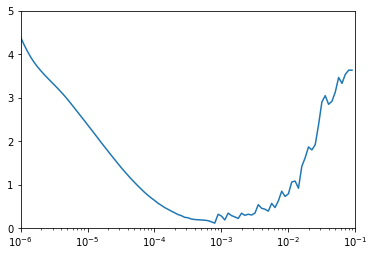

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-1, 0, 5])

#### 1.1 A myCallback class for setting the stopping criteria after reaching the expected accuracy level

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def __init__(self, expAccuracy):
        self.exp_Accuracy = expAccuracy

  def on_epoch_end(self, epoch, logs={} ):
    if(logs.get('val_accuracy')>self.exp_Accuracy):
      print("\nReached at the expected accuracy level on the validation set, so cancelling training!")
      self.model.stop_training = True

#### 1.2 A very simple model (with two Dense layers), Images resolution 28-28-3, validation accuracy = 93.9%. Let's say it the base model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,3)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(62, activation=tf.nn.softmax)

])

callbacks = myCallback(0.938) # Stops training after reaching 93.8% validation accuracy 
#opt = tf.keras.optimizers.Adam(learning_rate=0.0008)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Trainingimages28, y_train, validation_data=(Testimages28, y_test), 
          epochs=100, callbacks=[callbacks])


Epoch 1/100
143/143 [==============================] - 1s 4ms/step - loss: 2.1970 - accuracy: 0.5204 - val_loss: 1.4886 - val_accuracy: 0.6722
Epoch 2/100
143/143 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.7600 - val_loss: 1.0721 - val_accuracy: 0.7460
Epoch 3/100
143/143 [==============================] - 0s 3ms/step - loss: 0.7435 - accuracy: 0.8247 - val_loss: 0.7112 - val_accuracy: 0.8310
Epoch 4/100
143/143 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.8774 - val_loss: 0.5766 - val_accuracy: 0.8762
Epoch 5/100
143/143 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.9123 - val_loss: 0.6546 - val_accuracy: 0.8171
Epoch 6/100
143/143 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.9239 - val_loss: 0.5222 - val_accuracy: 0.8571
Epoch 7/100
143/143 [==============================] - 0s 3ms/step - loss: 0.2824 - accuracy: 0.9414 - val_loss: 0.4606 - val_accuracy: 0.8722

#### 1.3 Model with an additional set of Conv2D+MaxPooling2D layers with the base model, Validation accurcy = 96%

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)
])


callbacks = myCallback(0.95)  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(Trainingimages28, y_train, validation_data=(Testimages28, y_test), 
          epochs=100, callbacks=[callbacks])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               2769152   
_________________________________________________________________
dense_33 (Dense)             (None, 62)                15934     
Total params: 2,786,878
Trainable params: 2,786,878
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
143/143 [==============================] - 1s 5ms/step - loss: 1.5186 - accuracy: 0.6610 - val_lo

#### 1.4 Adding 3 Dropout layers with the previos model, Validation accuracy = 96.55% 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)

])

callbacks = myCallback(0.965)  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(Trainingimages28, y_train, validation_data=(Testimages28, y_test), 
          epochs=100, callbacks=[callbacks])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 10816)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               2769152   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)             

### 1.5 Model with 2 sets ConV+Pooling+Dropout layers with the base model, Validation accuracy = 98.2% 

 

In [ ]:
       
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(.3),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)

])

callbacks = myCallback(0.982)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(Trainingimages28, y_train, validation_data=(Testimages28, y_test), 
          epochs=100, callbacks=[callbacks])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 6400)            

### 1.6 Results summary with lower resolution images (28-28-3) 
So far we have achieved 98.2% accuracy on the validation set. 

#### Still we can try few more options with low resolution images
- Try padding, striding or both
- Apply image augmentation techniques
- Apply dilated convolution 
- Try with gray scale images

###In fact padding and/or striding do not incease the accuracy (not shown here). let's try image augmentation and dilated convolution. 

#### 1.6.1 Data Augmentation does not help with or without rescaling, because of lower accuracy

maximum accuracy achieved : 96.3% (Please see below at epoch = 94)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator   

train_datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_datagen.fit(Trainingimages28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(.3),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)
])

callbacks = myCallback(0.985)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_datagen.flow(Trainingimages28, y_train), validation_data=(Testimages28, y_test),  epochs=100, callbacks=[callbacks])

Epoch 1/100
143/143 [==============================] - 2s 17ms/step - loss: 3.0651 - accuracy: 0.2330 - val_loss: 2.3721 - val_accuracy: 0.4119
Epoch 2/100
143/143 [==============================] - 2s 17ms/step - loss: 2.3370 - accuracy: 0.3666 - val_loss: 1.8828 - val_accuracy: 0.5119
Epoch 3/100
143/143 [==============================] - 2s 17ms/step - loss: 1.9237 - accuracy: 0.4649 - val_loss: 1.2931 - val_accuracy: 0.6071
Epoch 4/100
143/143 [==============================] - 2s 17ms/step - loss: 1.6190 - accuracy: 0.5392 - val_loss: 1.0225 - val_accuracy: 0.6821
Epoch 5/100
143/143 [==============================] - 2s 17ms/step - loss: 1.3898 - accuracy: 0.6044 - val_loss: 1.0155 - val_accuracy: 0.6770
Epoch 6/100
143/143 [==============================] - 2s 17ms/step - loss: 1.2465 - accuracy: 0.6385 - val_loss: 0.7686 - val_accuracy: 0.8214
Epoch 7/100
143/143 [==============================] - 2s 17ms/step - loss: 1.1097 - accuracy: 0.6767 - val_loss: 0.7273 - val_accuracy:

#### 1.6.2 Let's see the effect of dilated convolution on the best CNN architecture so far

- dilation_rate=2 with first Conv2D layer gives upto 97.9% (at epoch = 45) accuracy only. So dilated convolution does not increase accuracy for 28-28-3 images 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), dilation_rate=2, activation=tf.nn.relu, input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(.3),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)

])

callbacks = myCallback(0.984)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(Trainingimages28, y_train, validation_data=(Testimages28, y_test), 
          epochs=100, callbacks=[callbacks])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 128)       3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 6400)            

#### 1.6.3 Are gray images effective??

If faster training is expected even with little lower accuracy then training with gray images is also fine. Because the same model gives:

- 98.2% validation accuracy with RGB images
- 97.5% validation accuracy with gray images




In [ ]:
Trainingimages28gray = np.array(Trainingimages28gray)
Trainingimages28gray = Trainingimages28gray.reshape(4575, 28, 28, 1)

Testimages28gray = np.array(Testimages28gray)
Testimages28gray = Testimages28gray.reshape(2520, 28, 28, 1)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(.3),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)

])

callbacks = myCallback(0.982)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(Trainingimages28gray, y_train, validation_data=(Testimages28gray, y_test), 
          epochs=100, callbacks=[callbacks])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 6400)            

### 2.0 Now let's try training with 56-56-3 images with more complex models and see whether higher resolution images are more effective

##### High resolution images need more complex models with more layers in order to enable encoding info into much lower dimensions. So here I tried with 4 sets of Conv+Pooling+Dropout layers with the base model

#### The best model with 28-28-3 images gives **98.2%** validation accuracy, while the model with 56-56-3 images results the accuracy of **98.89%**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), dilation_rate=2, activation=tf.nn.relu, input_shape=(56, 56, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), dilation_rate=1, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3,3), dilation_rate=1, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(512, (3,3),  activation=tf.nn.relu),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)
   
])

callbacks = myCallback(0.988)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(Trainingimages56, y_train, validation_data=(Testimages56, y_test), 
          epochs=100, callbacks=[callbacks])

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 52, 52, 128)       3584      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 512)     

===============================================================================
## 3.0 Transfer learning
#### So far we have seen that high resolution images need more complex models in order to secure convincing accuracy level. However, fine tuning a complex is highly time consuming and challenging. In this case using transfer learning would be a very smart approach. There are lots of highly efficient models and architecture available on *tf-hub*. We can just adopt one or more models with our dataset. 

Here we will consider the images with 112-112-3 pixels. Many classification architectures on tf-hub do not support this resolution. Here we will see the performance of two well-known models. Other models need very fine resolution.

- InceptionNet_v3 
- InceptionResNet       





#### 3.1 InceptionNet_v3 gives **99.13%** validation accuracy, InceptionResNet can also result nearly 99% validation accuracy (not shown here)

In [ ]:
IMAGE_SIZE = (112,112)
inceptionNet_HANDLE ='https://tfhub.dev/google/imagenet/inception_v3/classification/4'

model = tf.keras.Sequential([
        hub.KerasLayer(inceptionNet_HANDLE, input_shape= IMAGE_SIZE + (3,), trainable=True),
        #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(62, activation=tf.nn.softmax)
])

callbacks = myCallback(.991)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Trainingimages112, y_train, validation_data=(Testimages112, y_test),  epochs=100, callbacks=[callbacks])


Epoch 1/100
143/143 [==============================] - 16s 110ms/step - loss: 1.8943 - accuracy: 0.7080 - val_loss: 1075.3987 - val_accuracy: 0.0127
Epoch 2/100
143/143 [==============================] - 13s 93ms/step - loss: 1.2000 - accuracy: 0.8306 - val_loss: 1.2552 - val_accuracy: 0.8389
Epoch 3/100
143/143 [==============================] - 13s 93ms/step - loss: 0.6041 - accuracy: 0.9257 - val_loss: 0.5349 - val_accuracy: 0.9611
Epoch 4/100
143/143 [==============================] - 13s 93ms/step - loss: 0.4914 - accuracy: 0.9545 - val_loss: 0.6411 - val_accuracy: 0.9234
Epoch 5/100
143/143 [==============================] - 13s 93ms/step - loss: 0.5791 - accuracy: 0.9475 - val_loss: 0.7376 - val_accuracy: 0.9048
Epoch 6/100
143/143 [==============================] - 13s 92ms/step - loss: 0.5791 - accuracy: 0.9456 - val_loss: 0.9189 - val_accuracy: 0.9409
Epoch 7/100
143/143 [==============================] - 13s 92ms/step - loss: 0.5049 - accuracy: 0.9574 - val_loss: 0.5192 - va

### 4.0 Summary

In this notebook, various convolutional techniques have been applied to BelgianTS dataset for classification with 62 classes. How to develop a convincing model with excellent accuracy (e.g. 99% or higher) has been demonstrated here. What we have learnt so far:

- If we want faster training with nearly very good accuracy, training with gray images are OK
- RGB images gives slightly higher accuracy than that of gray images
- Lower resolution RGB images can give very good accuracy if the NN architecture and hyperparameters are well-tuned
- High resolution images can give slightly better accuracy than that of low resolution, however, CNN architecture for high quality images would be more and more complex depending on resolution, and the training time would be gradually higher. The process of fine tuning a compex model is highly time consuming
- A very smart approach in this case would be the idea of transfer learning, using a state-of-the-art model like ResNet, InceptionNet etc. A suitable model in this case generally can give excellent accuracy.